## Find the area of the Urban Residents neighborhood

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Load the datasets
neighborhoods = gpd.read_file("../../data/raw/neighborhoods.geojson")

urban_polygon = neighborhoods.loc[neighborhoods["name"] == "Urban Residents"]

urban_polygon.head()

,name,geometry
41,Urban Residents,"MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ..."


In [3]:
# Create a copy of the urban_polygon GeoDataFrame and convert it to Web Mercator EPSG:3857
urban_polygon_3857 = urban_polygon.to_crs(epsg=3857)
urban_polygon_3857.head()

,name,geometry
41,Urban Residents,"MULTIPOLYGON (((-9660441.281 4323289.005, -966..."


In [4]:
# Print the area of urban_polygon_3857 in kilometers squared
area_km2 = urban_polygon_3857.geometry.area / 1e6
print(f"Area of Urban Residents neighborhood: {area_km2.values[0]:.2f} km squared")

Area of Urban Residents neighborhood: 1.13 km squared


## The center of the Urban Residents neighborhood

In [5]:
# Create downtown_center from urban_poly_3857's geometry centroid
downtown_center = urban_polygon_3857.geometry.centroid
downtown_center

41    POINT (-9660034.312 4322835.783)
dtype: geometry

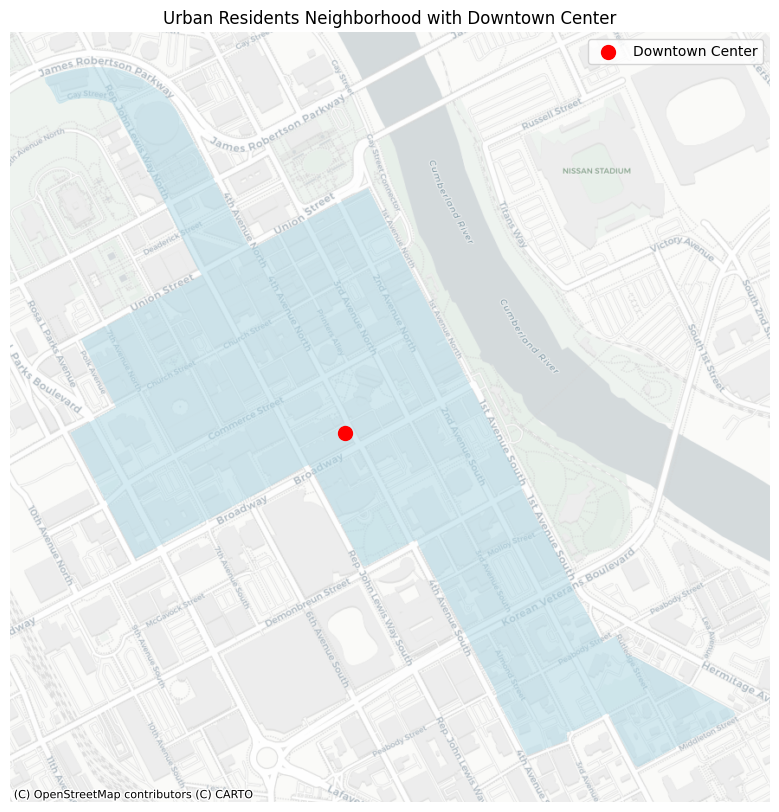

In [6]:
# Plot the urban_polygon_3857 and downtown_center
ax = urban_polygon_3857.plot(color="lightblue", alpha=0.5, figsize=(10, 10))
downtown_center.plot(
    ax=ax, color="red", marker="o", markersize=100, label="Downtown Center"
)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=urban_polygon_3857.crs)
ax.set_axis_off()
ax.set_title("Urban Residents Neighborhood with Downtown Center")
ax.legend()
plt.show()

## การเตรียมข้อมูลเพื่อคำนวณระยะทาง

ในแบบฝึกหัดนี้ คุณจะเตรียม GeoDataFrame ชื่อ `art_dist_meters`  
โดยแปลงพิกัดตำแหน่งผลงานศิลปะในย่านดาวน์ทาวน์ให้อยู่ในหน่วยเมตร  
ด้วยระบบพิกัด **EPSG:3857**

จากนั้น ในแบบฝึกหัดถัดไป คุณจะใช้ `art_dist_meters`  
เพื่อคำนวณระยะทางของผลงานศิลปะแต่ละชิ้นจากจุดศูนย์กลางของย่าน **Urban Residents** ในหน่วยเมตร

In [7]:
import pandas as pd
from shapely.geometry import Point

# Create a dataframe of art locations
art_df = pd.read_csv("../../data/raw/public_art.csv")
art_dist_meters = gpd.GeoDataFrame(
    art_df,
    geometry=gpd.points_from_xy(art_df["Longitude"], art_df["Latitude"]),
    crs="EPSG:4326",
)
art_dist_meters.head(2)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)",POINT (-86.8366 36.12856)
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)",POINT (-86.77774 36.16234)


In [8]:
# Set the coordinate reference system to Web Mercator (EPSG:3857) for distance calculations
art_dist_meters_3857 = art_dist_meters.to_crs(epsg=3857)
art_dist_meters_3857.head(2)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)",POINT (-9666606.094 4318325.479)
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)",POINT (-9660053.829 4322982.159)


In [9]:
center_point = downtown_center.iloc[0]
center_point

# Add a new column to art_dist_meters_3857 that calculates the distance from each art location to the downtown center
art_dist_meters_3857["center"] = center_point

In [10]:
art_dist_meters_3857.head(10)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry,center
0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,NaN,36.12856,-86.83660,"(36.12856, -86.8366)",POINT (-9666606.094 4318325.479),POINT (-9660034.312198784 4322835.7828131225)
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)",POINT (-9660053.829 4322982.159),POINT (-9660034.312198784 4322835.7828131225)
2,12th & Porter Mural,Kennedy,Kim,114 12th Avenue N,Porter all-weather outdoor paint,Mural,Kim Kennedy is a musician and visual artist wh...,36.15790,-86.78817,"(36.1579, -86.78817)",POINT (-9661214.891 4322369.977),POINT (-9660034.312198784 4322835.7828131225)
3,A Splash of Color,Stevenson and Stanley and ROFF (Harroff),Doug and Ronnica and Lynn,616 17th Ave. N.,"Steel, brick, wood, and fabric on frostproof c...",Mural,Painted wooden hoop dancer on a twenty foot po...,36.16202,-86.79975,"(36.16202, -86.79975)",POINT (-9662503.971 4322938.037),POINT (-9660034.312198784 4322835.7828131225)
4,A Story of Nashville,Ridley,Greg,"615 Church Street, Nashville TN",Hammered copper repousse,Frieze,"Inside the Grand Reading Room, this is a serie...",36.16215,-86.78205,"(36.16215, -86.78205)",POINT (-9660533.616 4322955.961),POINT (-9660034.312198784 4322835.7828131225)
5,Aerial Innovations Mural,Rudloff,Andee,202 South 17th St.,House paint on wood,Mural,NaN,36.17354,-86.73994,"(36.17354, -86.73994)",POINT (-9655845.952 4324526.557),POINT (-9660034.312198784 4322835.7828131225)
6,Airport Sun Project,Eldred,Dale,"1 Terminal Drive, Nashville TN",Light interference and transformation panels,Sculpture,Colorful panels along the truss system and tic...,36.13081,-86.66897,"(36.13081, -86.66897)",POINT (-9647945.608 4318635.587),POINT (-9660034.312198784 4322835.7828131225)
7,Andrew Jackson,Mills,Clark,"600 Charlotte Avenue, Nashville TN",Bronze sculpture with patina on a Tennessee ma...,Sculpture,A portrait sculpture of Andrew Jackson on a re...,36.16609,-86.78366,"(36.16609, -86.78366)",POINT (-9660712.84 4323499.232),POINT (-9660034.312198784 4322835.7828131225)
8,Angel,Ralston,William,"4715 Harding Pike, Nashville TN",Stone on concrete and brick base,Sculpture,An elongated figure consisting of a stylized f...,36.11975,-86.85343,"(36.11975, -86.85343)",POINT (-9668479.601 4317111.323),POINT (-9660034.312198784 4322835.7828131225)
9,Anticipation,Faxon,Russell,"505 Deaderick Street, Nashville TN",Cold cast bronze,Sculpture,A statue of a woman with legs crossed sitting ...,36.16489,-86.78184,"(36.16489, -86.78184)",POINT (-9660510.239 4323333.766),POINT (-9660034.312198784 4322835.7828131225)


## การคำนวณระยะทางของผลงานศิลปะจากศูนย์กลางย่าน

ตอนนี้คุณมีทั้งจุดศูนย์กลางของย่าน และตำแหน่งผลงานศิลปะที่ถูกแปลงพิกัดให้อยู่ในหน่วยเมตรเรียบร้อยแล้ว  
ขั้นตอนถัดไปคือการคำนวณระยะทางของผลงานศิลปะแต่ละชิ้นจากจุดศูนย์กลางของย่านในหน่วยเมตร

In [11]:
# Import package for pretty printing
import pprint

# Build a dictionary of titles and distances for Urban Residents art
art_distances = {}
for row in art_dist_meters_3857.iterrows():
    vals = row[1]
    key = vals["Title"]
    ctr = vals["center"]
    art_distances[key] = vals["geometry"].distance(ctr)

# Pretty print the art_distances
pprint.pprint(art_distances)

{'12th & Porter Mural': 1269.1502879185764,
 'A Splash of Color': 2471.774738463541,
 'A Story of Nashville': 513.5632030549256,
 'Aerial Innovations Mural': 4516.755210402906,
 'Airport Sun Project': 12797.594229775383,
 'Andrew Jackson': 948.9812821713308,
 'Angel': 10202.565989743533,
 'Anticipation': 688.8349105358698,
 'April Baby': 4779.394424955703,
 'Arial Triangle [from the Gravity Series]': 4315.322141151244,
 'Ariel': 4380.927773961883,
 'Athena Parthenos': 4294.778095695243,
 'Benedictio': 5313.624214285943,
 'Bicycle Bus-Green Fleet': 468.08286354880096,
 'Blowing Bubbles': 10202.565989743533,
 'Breaking Bread': 1279.25629330887,
 'Building a Positive Community': 2253.4179974122303,
 'Can-Do': 5648.086322081409,
 'Chet Atkins': 604.4489448162958,
 "Children's Chairs For The Seasons": 513.5632030549256,
 'Confederate Memorial': 5313.624214285943,
 'Confederate Private Monument': 4316.45910342536,
 'Confluence': 2918.5244121072938,
 'Cool Fences': 6491.8460301154555,
 'Danci

## สร้างตำแหน่งสำหรับ Folium จากจุดศูนย์กลางของย่าน

เพื่อสร้างแผนที่ด้วย Folium สำหรับย่าน **Urban Residents**  
คุณต้องสร้างค่าพิกัดตำแหน่ง (coordinate pair)  
ให้อยู่ในรูปแบบที่ Folium รองรับ

In [12]:
urban_polygon.head()

,name,geometry
41,Urban Residents,"MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ..."


In [13]:
urban_polygon.centroid

/var/folders/_n/29kx97qj3_n1t2qf9v6v2jvw0000gn/T/ipykernel_34462/3705185275.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  urban_polygon.centroid


41    POINT (-86.77756 36.16128)
dtype: geometry

/var/folders/_n/29kx97qj3_n1t2qf9v6v2jvw0000gn/T/ipykernel_34462/2303798492.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  urban_center = urban_polygon.centroid.squeeze()


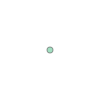

In [14]:
# Create urban_center
urban_center = urban_polygon.centroid.squeeze()
urban_center

In [15]:

# Create array for folium map (latitude, longitude)
urban_location = [urban_center.y, urban_center.x]
urban_location

[36.161278209287914, -86.77756457127047]

## Create a folium map of downtown Nashville

In [16]:
# Construct a folium map with urban_location
import folium

downtown_map = folium.Map(location=urban_location, zoom_start=15)

# Display the map
display(downtown_map)

In [17]:
# Create array for called folium_loc from the urban_polygon center point
point = urban_polygon.centroid.squeeze()
folium_loc = [point.y, point.x]

# Construct a map from folium_loc: downtown_map
downtown_map = folium.Map(location = folium_loc, zoom_start = 15)

# Draw our neighborhood: Urban Residents
folium.GeoJson(urban_polygon.geometry).add_to(downtown_map)

# Display the map
display(downtown_map)

/var/folders/_n/29kx97qj3_n1t2qf9v6v2jvw0000gn/T/ipykernel_34462/2801261817.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = urban_polygon.centroid.squeeze()


In [18]:
art_gdf = gpd.GeoDataFrame(art_df, geometry=gpd.points_from_xy(art_df["Longitude"], art_df["Latitude"]), crs="EPSG:4326")
neighborhoods_with_art = gpd.sjoin(art_gdf, neighborhoods, predicate='within')
urban_art = neighborhoods_with_art[neighborhoods_with_art["name"] == "Urban Residents"]

In [19]:
urban_art.head(2)

,Title,Last Name,First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry,index_right,name
1,[Fourth and Commerce Sculpture],Walker,Lin,"333 Commerce Street, Nashville TN",NaN,Sculpture,NaN,36.16234,-86.77774,"(36.16234, -86.77774)",POINT (-86.77774 36.16234),41,Urban Residents
4,A Story of Nashville,Ridley,Greg,"615 Church Street, Nashville TN",Hammered copper repousse,Frieze,"Inside the Grand Reading Room, this is a serie...",36.16215,-86.78205,"(36.16215, -86.78205)",POINT (-86.78205 36.16215),41,Urban Residents


In [20]:

# Iterate through the urban_art and print each part of tuple returned
for row in urban_art.iterrows():
  print('first part: ', row[0])
  print('second part: ', row[1])

# Create a location and marker with each iteration for the downtown_map
for row in urban_art.iterrows():
    row_values = row[1] 
    location = [row_values['Latitude'], row_values['Longitude']]
    marker = folium.Marker(location = location)
    marker.add_to(downtown_map)

# Display the map
display(downtown_map)

first part:  1
second part:  Title                [Fourth and Commerce Sculpture]
Last Name                                     Walker
First Name                                       Lin
Location           333 Commerce Street, Nashville TN
Medium                                           NaN
Type                                       Sculpture
Description                                      NaN
Latitude                                    36.16234
Longitude                                  -86.77774
Mapped Location                (36.16234, -86.77774)
geometry                  POINT (-86.77774 36.16234)
index_right                                       41
name                                 Urban Residents
Name: 1, dtype: object
first part:  4
second part:  Title                                           A Story of Nashville
Last Name                                                     Ridley
First Name                                                      Greg
Location               

In [21]:
# Print the urban_art titles
print(urban_art['Title'])

#Print the urban_art descriptions
print(urban_art['Description'])

# Replace Nan and ' values in description
urban_art['Description'].fillna('', inplace = True)
urban_art['Description'] = urban_art['Description'].str.replace("'", "`")

#Print the urban_art descriptions again
print(urban_art['Description'])

1                        [Fourth and Commerce Sculpture]
4                                   A Story of Nashville
21                                           Chet Atkins
22                     Children's Chairs For The Seasons
34                                       Foliated Scroll
39                                          Gone Fishing
40                             Happy Times at The Arcade
54                                     Johnny Cash Mural
55                                 La Storia della Terra
57                                 Les Paul Guitar Mural
59                                         Library Doors
60                               Lightning Wire Fountain
66     Nashville, A History through Maps and Aerial V...
67                                               Oh, Roy
68                                  Orpheus and Eurydice
75                               Piecing It All Together
104                                  The Birth of Apollo
105                            

/var/folders/_n/29kx97qj3_n1t2qf9v6v2jvw0000gn/T/ipykernel_34462/1200939493.py:8: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  urban_art['Description'].fillna('', inplace = True)


In [22]:
# Construct downtown map
downtown_map = folium.Map(location = urban_location, zoom_start = 15)
folium.GeoJson(urban_polygon).add_to(downtown_map)

# Create popups inside the loop you built to create the markers
for row in urban_art.iterrows():
    row_values = row[1] 
    location = [row_values['Latitude'], row_values['Longitude']]
    popup = (str(row_values['Title']) + ': ' + 
             str(row_values['Description'])).replace("'", "`")
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(downtown_map)

# Display the map.
display(downtown_map)